In [1]:
# 使用stapep.generate_template生成非标准氨基酸的参数模版
# --smiles: 非标准氨基酸的SMILES，需要包括主链上的COOH和NH2
# --name: 生成的模板的名字，必须是大写的3个字符
# --output: 输出路径，如果没有指定，默认为当前目录的name文件夹里
# --charge: 非标准氨基酸的电荷，如果没有指定，默认为0.0

# Using stapep.generate_template to generate parameter templates for non-standard amino acids
# --smiles: SMILES of the non-standard amino acid, including COOH and NH2 on the main chain
# --name: The name of the generated template, must be three uppercase characters
# --output: Output path, if not specified, it will default to the name folder in the current directory
# --charge: The charge of the non-standard amino acid, if not specified, it will default to 0.0

!python -m stapep.generate_template \
    --smiles "N=C(NCCC[C@H](N)C(=O)O)N[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O" \
    --name "R1A" \
    --output "./data/R1A" \
    --charge 0.0

args.smiles: N=C(NCCC[C@H](N)C(=O)O)N[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O
obabel -ismi R1A.smi -osdf -O R1A.sdf --gen3D
1 molecule converted
antechamber -fi sdf -i R1A.sdf -bk R1A -fo ac -o R1A.ac -c bcc -at amber

Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to amber; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for sdf File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

sh: /home/dahuilangda/Simulation/miniconda3/envs/stap/lib/libtinfo.so.6: no version information available (required by sh)
/bin/bash: /home/dahuilangda/Simul

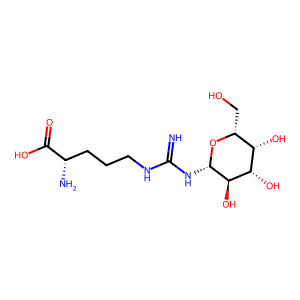

In [2]:
# 非标准氨基酸需要提供的结构如下所示
# The structure of the non-standard amino acid is as follows

from rdkit import Chem
from rdkit.Chem import Draw

smiles = "N=C(NCCC[C@H](N)C(=O)O)N[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O"
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [3]:
from stapep.structure import Structure

additional_residues = {
    'R1A': (
        'data/R1A/R1A.prepin',
        'data/R1A/frcmod.R1A',
    )
}

seq = 'Ac-BATPRRR-BLBR-R1A-FKRLQ' # Define the peptide sequence
st = Structure(verbose=True) # Initialize the structure class
st.de_novo_3d_structure(seq=seq, output_pdb='data/R1A_peptide.pdb', additional_residues=additional_residues)

/home/dahuilangda/Simulation/miniconda3/envs/stap/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
/home/dahuilangda/Simulation/miniconda3/envs/stap/lib/python3.9/site-packages/Bio/Data/SCOPData.py:18: BiopythonDeprecationWarning: The 'Bio.Data.SCOPData' module will be deprecated in a future release of Biopython in favor of 'Bio.Data.PDBData.
  warnings.warn(
Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.weight', 'esm.contact_head.regression.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:parm

-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/prep to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/lib to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading ti

INFO:root:Running short time simulation for 100000 steps


Minimizing...
Running...
Done! Time elapsed: 16.877919912338257 s
/tmp/87496838-8d8c-40b5-b5f3-0d9323acacb3/traj.dcd /tmp/87496838-8d8c-40b5-b5f3-0d9323acacb3/pep_vac.prmtop


'data/R1A_peptide.pdb'

In [4]:
# Install py3Dmol: 
# mamba install -c conda-forge py3dmol
# mamba install -c conda-forge jupyterlab
# mamba install -c conda-forge nodejs
# jupyter labextension install jupyterlab_3dmol

import py3Dmol
 
p = py3Dmol.view(query='data/R1A_peptide.pdb')
# 整体显示卡通的同时，显示R1A的球棒模型
p.setStyle({}, {'cartoon': {'color': 'spectrum'}})
p.setStyle({'resn': 'R1A'}, {'cartoon': {'color': 'spectrum'}, 'stick': {}})
p.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Moleculer Dynamics Simulation of Proteins Containing Non-Standard Amino Acids

In [5]:
from stapep.molecular_dynamics import PrepareProt, Simulation

output = 'data/R1A'

# Prepare the protein for molecular dynamics simulation
pp = PrepareProt(seq, output, method='alphafold', additional_residues=additional_residues)
pp._gen_prmtop_and_inpcrd_file()

sim = Simulation(output)
sim.setup(
        type='implicit', # 'explicit' or 'implicit'
        solvent='water', # 'water' or 'chloroform'
        temperature=300, # Kelvin
        friction=1, # ps^-1
        timestep=2, # fs
        interval=100, # ps
        nsteps=500000 # 1 ns
    )
sim.minimize()
sim.run()

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.weight', 'esm.contact_head.regression.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:parmed.structure:Adding bonds...
INFO:parmed.structure:Adding angles...
INFO:parmed.structure:Adding dihedrals...
INFO:parmed.structure:Adding Ryckaert-Bellemans torsions...
INFO:parmed.structure:Adding Urey-Bradleys...
INFO:parmed.structure:Adding improper torsions...
INFO:parmed.structure:Adding CMAP torsions...
INFO:parmed.structure:Adding trigonal angle terms...
INFO:parmed.structure:Adding out-of-plane bends...
INFO:parmed.structure:Adding pi-torsions...
INFO:parmed.structure:Adding stretch-bends...
INFO:parmed.structure:Adding torsion-torsions...
INFO:parmed.structure:Adding Nonbonded force...
INFO:parmed.structure:Adding GB force...


-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/prep to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/lib to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading ti

#### Extracting features from the three-dimensional structure of peptides (obtained from molecular dynamics trajectories)

In [6]:
import os
from stapep.utils import PhysicochemicalPredictor, ProtParamsSeq

# initialize the PhysicochemicalPredictor class, which automatically loads trajectory using pytraj.
pcp = PhysicochemicalPredictor(sequence=seq, 
                                topology_file=os.path.join(output, 'pep_vac.prmtop'),
                                trajectory_file=os.path.join(output, 'traj.dcd'),
                                start_frame=0)

data/R1A/traj.dcd data/R1A/pep_vac.prmtop


In [7]:
# You can call the calc_helix_percent, calc_extend_percent, and calc_loop_percent methods 
# to respectively calculate the percentages of helix, strand, and coil in the secondary structure.

print('helix percent: ', pcp.calc_helix_percent())
print('sheet percent: ', pcp.calc_extend_percent())
print('loop percent: ', pcp.calc_loop_percent())

helix percent:  0.20142222222222222
sheet percent:  4.444444444444444e-05
loop percent:  0.7985333333333332


In [8]:
# save the mean structure of the trajectory
pcp._save_mean_structure(os.path.join(output, 'mean_structure.pdb'))

# calculate the weight of the protein using the mean structure
print('weight', pcp.calc_weight(os.path.join(output, 'mean_structure.pdb')))
# calculate the Mean B-factor, Molecular Surface, Mean Gyration Radius, Hydrophobic Index, and 3D-PSA
print('mean bfactor: ', pcp.calc_mean_bfactor())
print('mol surf: ', pcp.calc_mean_molsurf())
print('mean gyrate: ', pcp.calc_mean_gyrate())
print('hydrophobic index: ', pcp.calc_hydrophobic_index(os.path.join(output, 'mean_structure.pdb')))
print('psa: ', pcp.calc_psa(os.path.join(output, 'mean_structure.pdb')))
print('total number of hydrogen bonds: ', pcp.calc_n_hbonds())

weight 2414.0389999999984
mean bfactor:  190.2779644700375


mol surf:  1830.2296376834504
mean gyrate:  9.026684269192096
hydrophobic index:  -0.7733333333333332
psa:  1002.5029907226562
total number of hydrogen bonds:  9


In [9]:
# extract 2D structure of the peptide
pcp.extract_2d_structure(os.path.join(output, 'mean_structure.pdb'))

'[H]NC(N([H])C([H])([H])C([H])([H])C([H])([H])C([H])(C(O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)O)C([H])([H])C([H])([H])C(=O)N([H])[H])C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[N+]([H])([H])[H])C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])N([H])C(=O)[C@@]([H])(N([H])C(O)C([H])(N([H])C(=O)[C@@]([H])(N([H])C(O)C([H])(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@@]1([H])N(C(=O)[C@@]([H])(N([H])C(=O)[C@@]([H])(N([H])C(O)C([H])(N([H])C(=O)C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])[H])[C@]([H])(O[H])C([H])([H])[H])C([H])([H])C([H])([H])C1([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])C([H])([H])

### extract features from sequence

In [10]:
# initialize the ProtParamsSeq class
pps = ProtParamsSeq(seq)

In [11]:
# You can call the following methods to calculate the physicochemical properties of the peptide.
# length, weight, hydrophobicity index, charge, charge density, aromaticity, fraction of arginine, fraction of lysine, lyticity index, and isoelectric point.
print('length: ', pps.seq_length)
# print('weight: ', pps.weight) # This method is not implemented yet if the sequence contains non-standard amino acids.
# print('hydrophobicity index: ', pps.hydrophobicity_index) # This method is not implemented yet if the sequence contains non-standard amino acids.
print('charge', pps.calc_charge(pH=7.0)) # Be careful if the sequence contains non-standard amino acids, the charge will be calculated based on the standard amino acids.
# print('charge_density', pps.calc_charge_density(pH=7.0)) # The charge density is calculated by dividing the charge by the length of the peptide.
print('aromaticity', pps.aromaticity) # Be careful if the sequence contains non-standard amino acids, the aromaticity will be calculated based on the standard amino acids.
print('fraction_arginine', pps.fraction_arginine)
print('fraction_lysine', pps.fraction_lysine)
# print('lyticity index: ', pps.lyticity_index) # This method is not implemented yet if the sequence contains non-standard amino acids.
print('isoelectric_point: ', pps.isoelectric_point) # Be careful if the sequence contains non-standard amino acids, the isoelectric point will be calculated based on the standard amino acids.

length:  19
charge 6.996
aromaticity 0.05263157894736842
fraction_arginine 0.3157894736842105
fraction_lysine 0.05263157894736842
isoelectric_point:  11.999967765808105
